In [44]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances_argmin

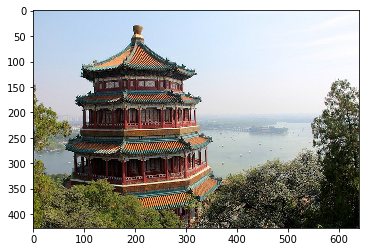

In [85]:
image = load_sample_image("china.jpg")
plt.imshow(image)

In [86]:
# 图片的间隔， 0-255 间隔太大， 需要图片归一化处理
#  转化为 png 
image = np.array(image, dtype=float)/255

In [87]:
# 图片的长度，像素点
w, h, d = image.shape

In [88]:
image.reshape((-1, 3)).shape

(273280, 3)

In [89]:
# 从图片中抽取64种主颜色
color_cluster = 64

In [90]:
kmeans = KMeans(color_cluster)

In [91]:
from sklearn.utils import shuffle

X_train_s = shuffle(X_train)

In [92]:
# 训练维度 必须Wie 二维的
# kmeans.fit(image)
X_train = image.reshape((-1, 3))

# 数据量太大，随机从数据中选取一部分进行训练，
#将数据的顺序打乱
kmeans.fit(X_train_s[:10000])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=64, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [93]:
# 64 个主色
colors = kmeans.predict(X_train_s[:10000])


In [94]:
from pandas import Series, DataFrame

s = Series(colors)
s.unique().shape

(64,)

In [95]:
# 创造方法，合成图片

def create_image(colors, labels, w, h, d):
    # 创建空白画面
    image = np.ones((w, h, d))
    # 添加色素，64个主颜色
    # for 循环添加
    label_id = 0
    for i in range(w):
        for j in range(h):
            index = labels[label_id]
            image[i, j] = colors[index]
            label_id += 1
    return image
    

In [96]:
colors = kmeans.cluster_centers_
colors.shape

(64, 3)

In [97]:
# 将图片中的数据添加标签
labels = kmeans.predict(X_train)
labels.shape

(273280,)

In [98]:
image_new = create_image(colors, labels, w, h, d)
image_new.shape

(427, 640, 3)

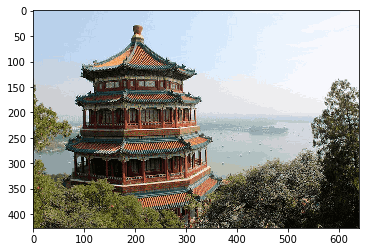

In [99]:
# 可视化
plt.imshow(image_new)

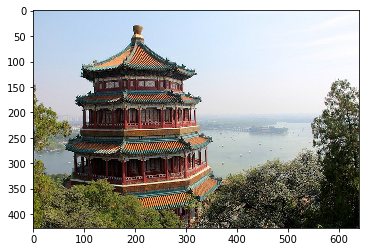

In [100]:
plt.imshow(image)

In [103]:
image_x = image.reshape((-1,3))
image_x.shape

(273280, 3)

In [105]:
# 随机打乱顺序
X_trian_s = shuffle(image_x)
# image_x
# 随机选取 64个点
colors = X_trian_s[:64]

In [110]:
image_x.shape

(273280, 3)

In [109]:
# 算法， 计算最小距离，一个点和一堆点
labels = pairwise_distances_argmin(colors, image_x, axis=0)
labels

array([24, 24, 24, ..., 46, 27, 16], dtype=int64)

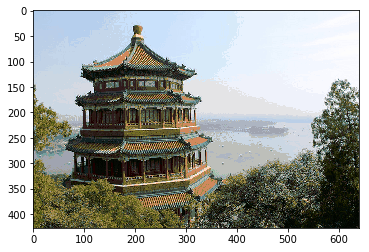

In [111]:
image_x = create_image(colors, labels, w, h, d)
plt.imshow(image_x)

In [ ]:
# 生成随机的 label pairwise_distances_argmin
